# 1. Tratamento inicial dos dados de solo


## Importando as bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skgstat.plotting import backend
plt.style.use('ggplot')

## Abrindo o csv PronaSolos

In [2]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None) 
# Carregando o csv
df_prona = pd.read_csv('../dados/solo/perfis_pronasolos_20201202v2.csv')
print('Quantidade de linhas no csv:',len(df_prona))
#df_prona.head(4)

Quantidade de linhas no csv: 34464


## Selecionando todos os pontos com profundidade de 0 até 40 do Brasil

In [3]:
lista_series = []
   
#Selecionando informações com a profundidade de 0 até 40
df_prona = df_prona.loc[(df_prona['profundi_1'] == 0 ) & (df_prona['profundida'] <= 40.0)]

if any(df_prona['codigo_pon'].duplicated()):
    # se existir pontos duplicados é realizado um agrupamento com os maiores valores da profundidade inferior (profundida)
    duplicados = df_prona.groupby('codigo_pon').profundida.apply(max)
    # Selecionando no dataframe somente os pontos com maior profundidade inferior (profundida)
    for i in duplicados.index:
        profundida_max = df_prona.loc[(df_prona['codigo_pon'] == i ) & (df_prona['profundida'] == duplicados[i])]
        lista_series.append(profundida_max)      
else:
    print('DataFrame não possui pontos duplicados')
# DataFrame com os valores agrupados    
df = pd.concat(lista_series)


In [4]:
df.head()

,FID,the_geom,sigla,titulo,ano,referencia,autor,nivel_leva,codigo_pon,sigla_bd,tipo_ponto,responsave,data_colet,material_o,uso_atual,observacoe,situacao_c,gcs_latitu,gcs_longit,municipio,uf,simbolo_ho,profundida,profundi_1,descricao_,calhau,cascalho,terra_fina,areia_gros,areia_fina,areia_tota,silte,argila,argila_dis,grau_flocu,relacao_si,densidade_,densidad_1,porosidade,retencao_u,retencao_1,agua_dispo,ph_h2o,ph_kcl,complexo_s,complexo_1,complexo_2,complexo_3,valor_s,aluminio_t,hidrogenio,valor_t,valor_v,saturacao_,fosforo_as,carbono_or,nitrogenio,carbono_ni,ataque_sul,ataque_s_1,ataque_s_2,ataque_s_3,ataque_s_4,ataque_s_5,ki,kr,al2o3_fe2o,cdb_fe,equivalent,saturaca_1,condutivid,agua_pasta,sais_sol_e,sais_sol_1,sais_sol_2,sais_sol_3,sais_sol_4,sais_sol_5,sais_sol_6,classe_tex,grau_consi,grau_con_1,pegajosida,plasticida
18456,perfis_pronasolos_20201202v2.18409,POINT (-45.29025863 -18.19029322),bd_solos562,Levantamento de Reconhecimento de Média Intens...,2004.0,"Motta, P. E. F. da., Baruqui, A. M., Santos, H...","Paulo E da Motta, Alfredo Baruqui, Humberto G ...",Não informado,5250,bd_solos,Perfil completo,Antônio M. Pires Filho e Alfredo M. Baruqui.,1983-09-18,"Produtos do intemperismo de arcósios, ardósias...",Pastagem natural,NaN,Corte de estrada,-18.190293,-45.290259,São Gonçalo do Abaeté,MG,A,10.0,0.0,bruno-avermelhado (5YR 4/4); franco; fraca peq...,0.0,0.0,1000.0,20.0,410.0,430.0,350.0,220.0,180.0,18.0,1.59,NaN,NaN,NaN,NaN,NaN,NaN,4.8,3.9,NaN,NaN,0.15,0.01,0.6,1.6,2.1,4.3,14.0,73.0,1,7.200000,1.1,NaN,100.0,95.0,37.0,2.900000,NaN,NaN,1.79,1.43,4.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Franca,NaN,NaN,NaN,NaN
18471,perfis_pronasolos_20201202v2.18422,POINT (-46.41031048 -19.82031836),bd_solos562,Levantamento de Reconhecimento de Média Intens...,2004.0,"Motta, P. E. F. da., Baruqui, A. M., Santos, H...","Paulo E da Motta, Alfredo Baruqui, Humberto G ...",Não informado,5251,bd_solos,Perfil completo,Francisco M. Baruqui e Paulo Emiliom F. da Motta,1984-05-30,Cobertura detrítica pseudoautóctone de textura...,Pastagem natural,NaN,Corte de estrada,-19.820318,-46.410310,Pratinha,MG,A,20.0,0.0,bruno-escuro (10YR 3/3); argila muito cascalhe...,100.0,590.0,310.0,130.0,280.0,410.0,190.0,400.0,320.0,20.0,0.48,NaN,NaN,NaN,NaN,NaN,NaN,4.8,3.9,NaN,NaN,0.26,0.05,1.0,2.0,5.9,8.9,11.0,67.0,NaN,18.500000,1.7,NaN,139.0,151.0,91.0,5.100000,NaN,NaN,1.57,1.13,2.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argila muito cascalhenta,Dura,Firme,NaN,NaN
27097,perfis_pronasolos_20201202v2.27026,POINT (-47.83037102 -19.03030264),bd_solos562,Levantamento de Reconhecimento de Média Intens...,2004.0,"Motta, P. E. F. da., Baruqui, A. M., Santos, H...","Paulo E da Motta, Alfredo Baruqui, Humberto G ...",Não informado,5252,bd_solos,Perfil completo,Francisco M. Baruqui e Paulo E. F. da Motta.,1984-05-30,"Cobertura detrítica muito argilosa, produto do...",Pastagem natural,Trincheira com 180 cm de profundidade.,Trincheira,-19.030303,-47.830371,Indianópolis,MG,A,25.0,0.0,"bruno-escuro (7,5YR 3,5/4); argila muito casca...",80.0,740.0,180.0,90.0,240.0,330.0,230.0,440.0,360.0,18.0,0.52,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.9,0.6,0.4,0.30,0.04,1.3,1.6,5.2,8.1,16.0,55.0,NaN,12.200000,1.5,NaN,136.0,144.0,70.0,6.400000,NaN,NaN,1.61,1.23,3.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argila muito cascalhenta,NaN,NaN,Pegajosa,Plástica
515,perfis_pronasolos_20201202v2.483,POINT (-45.88028501 -18.58029873),bd_solos562,Levantamento de Reconhecimento de Média Intens...,2004.0,"Motta, P. E. F. da., Baruqui, A. M., Santos, H...","Paulo E da Motta, Alfredo Baruqui, Humberto G ...",Não informado,5253,bd_solos,Perfil completo,Francisco M. Baruqui e Paulo E. F. Motta.,1984-06-03,Produtos do intemperismo do Arenito,Pastagem natural,NaN,Barranco,-18.580299,-45.880285,Patos de Minas,MG,A,10.0,0.0,bruno-avermelhado (5YR 4/4); franco arenoso; f...,0.0,0.0,1000.0,10.0,40.0,50.0,480.0,470.0,140.0,70.0,1.02,NaN,NaN,NaN,NaN,NaN,NaN,4.8,4.0,NaN,NaN,0.07,0.01,0.2,0.7,1.3,2.2,9.0

## Verificando se DataFrame possue linhas duplicadas

In [5]:
any(df.duplicated())

False

## Verificando se DataFrame possue pontos duplicados

In [6]:
any(df['codigo_pon'].duplicated())

True

## Selecionando somente os pontos com a versão mais atual

- **Devido ao dataframe possuir mais de um ponto com o mesmo range de profundidade, porém com as informações do solo distintas, será feito um filtro por versão das informações através da coluna FID.**

In [7]:
lista_versao = []
versao = df.groupby('codigo_pon').FID.apply(max)
for v in versao.index:
    versao_max = df.loc[(df['codigo_pon'] == v ) & (df['FID'] == versao[v])]
    lista_versao.append(versao_max)
    
df = pd.concat(lista_versao)


In [8]:
#df.head()

## Verificando se DataFrame possue pontos duplicados

In [9]:
any(df['codigo_pon'].duplicated())

False

## Renomeando colunas do df


In [10]:
df.rename(columns={'argila': 'Argila','fosforo_as': 'Fosforo_Assimilavel', 'codigo_pon': 'cod_ponto', 'gcs_latitu':'latitude', 
                   'gcs_longit': 'longitude', 'material_o': 'Material_origem'},inplace = True)   

In [11]:
#df

# 2. Selecionando pontos do estado do Paraná

In [12]:
df_pr = df[df['uf'] == 'PR']
print('Quantidade de cidades no estado do PR: ',len(df_pr['municipio'].unique()))
#df_pr

Quantidade de cidades no estado do PR:  113


## 2.1 Criando dataframe com informações de Argila no estado do Paraná

In [13]:
df_pr_argila = df_pr[['Argila', 'latitude', 'longitude']].dropna()
df_pr_argila.reset_index(inplace=True, drop=True)

# Métricas estatísticas
df_pr_argila['Argila'].describe()

count    332.000000
mean     520.897590
std      219.904789
min       10.000000
25%      367.500000
50%      570.000000
75%      710.000000
max      830.000000
Name: Argila, dtype: float64

## Plot dos dados de Argila

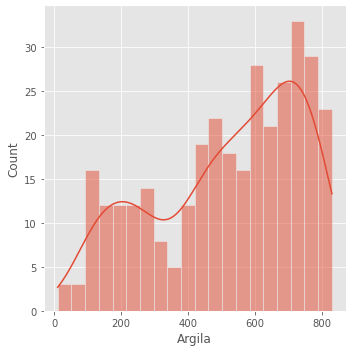

In [14]:
sns.displot(df_pr_argila, x="Argila",  kde=True, bins=20)

## Outliers com Z-score

In [15]:
outliers=[]

def find_outliers(data_set):
    # Corte de Desvio Padrão
    corte_dp =2
    media = np.mean(data_set)
    dp =np.std(data_set)
    
    
    for dado in data_set:
        
        z_score = (dado - media)/dp 
        if np.abs(z_score) > corte_dp:
            outliers.append(dado)
            
    #print('Os outliers são: ', outliers)
    
    return outliers

In [16]:
dataset = df_pr_argila['Argila'].tolist()
outliers = find_outliers(dataset)
#outliers

In [17]:
len(df_pr_argila['Argila'])

332

In [18]:
df_argila_outliers = df_pr_argila.copy()
for o in outliers:
    indexNames = df_argila_outliers[df_argila_outliers['Argila'] == o ].index
    df_argila_outliers.drop(indexNames, inplace = True)
    
len(df_argila_outliers)

327

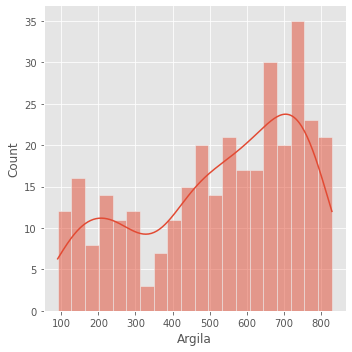

In [19]:
sns.displot(df_argila_outliers, x="Argila",  kde=True, bins=20)

# 3. Semivariogramas usando scikit-gstat

### -  Semivariogramas utilizando o dataframe com os dados de Argila do estado do Paraná ( df_pr_argila)

### Importação das bibliotecas

In [20]:
from scipy.optimize import curve_fit
from skgstat import models
import skgstat as skg

### Separando coordenadas e valores

In [21]:
coords= df_pr_argila[['longitude','latitude']].to_numpy()
values = df_pr_argila['Argila'].to_numpy()

## 3.1 Modelo Gaussiano

In [22]:
def gaussiano(coords, values):
    
    # Instânciando variograma
    Vg = skg.Variogram(coords, values, normalize=True, n_lags=25, maxlag=100, model='gaussian', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even' )
    
    
    # Plot do semivariograma experimental
    Vg.plot();
    
    xdata_g = Vg.bins
    ydata_g = Vg.experimental

    # initial guess - otherwise lm will not find a range
    p0 = [np.mean(xdata_g), np.mean(ydata_g), 0]
    cof, cov =curve_fit(models.gaussian, xdata_g, ydata_g, p0=p0)
    
    # Coeficientes encontrados para ajustar o modelo aos dados
    print('Coeficientes encontrados para ajustar o modelo aos dados:')
    print("range: %.2f   sill: %.f   nugget: %.2f" % (cof[0], cof[1], cof[2]))
    
    xi_g =np.linspace(xdata_g[0], xdata_g[-1], 100)
    yi_g = [models.gaussian(h, *cof) for h in xi_g]
    
    rmse_ga = Vg.rmse
    r_ga = Vg.describe().get('effective_range')
    print('\nGaussian   RMSE: %.2f' % rmse_ga)
    print('Gaussian effective range:    %.1f' % r_ga)
    
    return xdata_g, ydata_g, xi_g, yi_g, Vg
    

/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Coeficientes encontrados para ajustar o modelo aos dados:
range: 1.58   sill: 25122   nugget: 25376.95

Gaussian   RMSE: 7031.41
Gaussian effective range:    0.8


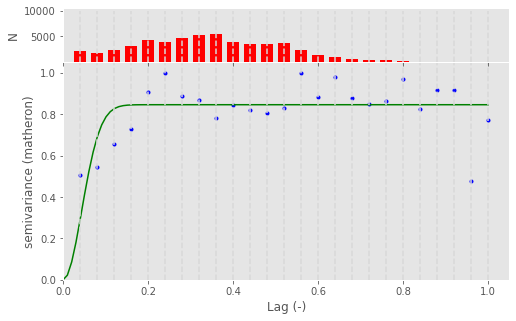

In [23]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)

Text(0.5, 1.0, 'Semivariograma - Modelo Gaussiano')

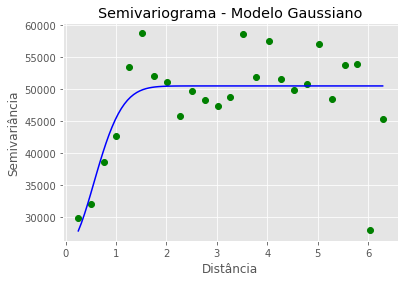

In [24]:
plt.plot(xdata_g, ydata_g, 'og')
plt.plot(xi_g, yi_g, '-b');
plt.xlabel('Distância')
plt.ylabel('Semivariância')
plt.title('Semivariograma - Modelo Gaussiano')

## 3.2 Esférico


In [25]:
def esferico(coords, values):
    
    # Instânciando variograma
    Vs = skg.Variogram(coords, values, normalize=True, n_lags=25, maxlag=500, model='spherical', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even')
    # Plot do variograma experimental
    Vs.plot();
    
    xdata_s = Vs.bins
    ydata_s = Vs.experimental

    # initial guess - otherwise lm will not find a range
    p0 = [np.mean(xdata_s), np.mean(ydata_s), 0]
    cof, cov =curve_fit(models.spherical, xdata_s, ydata_s, p0=p0)
    
    # Coeficientes encontrados para ajustar o modelo aos dados
    print('Coeficientes encontrados para ajustar o modelo aos dados:')
    print("range: %.2f   sill: %.f   nugget: %.2f" % (cof[0], cof[1], cof[2]))
    
    xi_s = np.linspace(xdata_s[0], xdata_s[-1], 100)
    yi_s = [models.spherical(h, *cof) for h in xi_s]
    
    rmse_s = Vs.rmse
    r_s = Vs.describe().get('effective_range')
    print('\nSpherical   RMSE: %.2f' % rmse_s)
    print('Spherical effective range:    %.1f' % r_s)
    
    return xdata_s, ydata_s, xi_s, yi_s, Vs

/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Coeficientes encontrados para ajustar o modelo aos dados:
range: 1.56   sill: 30428   nugget: 20034.44

Spherical   RMSE: 6576.22
Spherical effective range:    1.1


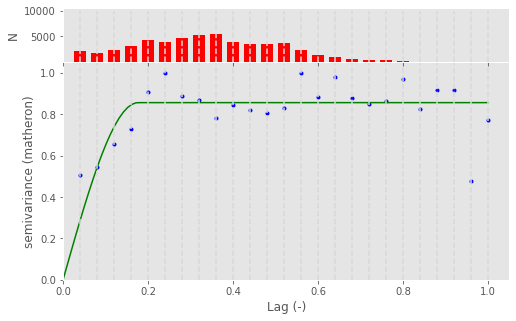

In [26]:
xdata_s, ydata_s, xi_s, yi_s, Vs = esferico(coords, values)

Text(0.5, 1.0, 'Semivariograma - Modelo Esférico')

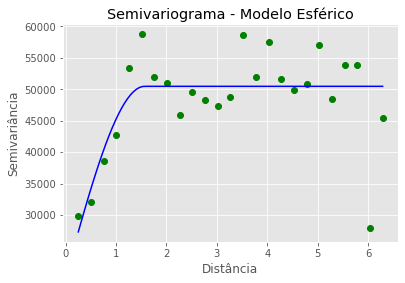

In [27]:
plt.plot(xdata_s, ydata_s, 'og')
plt.plot(xi_s, yi_s, '-b');
plt.xlabel('Distância')
plt.ylabel('Semivariância')
plt.title('Semivariograma - Modelo Esférico')

## 3.3 Exponencial

In [28]:
def exponencial(coords, values):
    
    # Instânciando variograma
    Ve = skg.Variogram(coords, values, normalize=True, n_lags=25, maxlag=500, model='exponential', fit_method='trf',
                       estimator='matheron', dist_func='euclidean', bin_func='even')
    # Plot do variograma experimental
    Ve.plot();
    
    xdata_e = Ve.bins
    ydata_e = Ve.experimental

    # initial guess - otherwise lm will not find a range
    p0 = [np.mean(xdata_e), np.mean(ydata_e), 0]
    cof, cov =curve_fit(models.exponential, xdata_e, ydata_e, p0=p0)
    
    # Coeficientes encontrados para ajustar o modelo aos dados
    print('Coeficientes encontrados para ajustar o modelo aos dados:')
    print("range: %.2f   sill: %.f   nugget: %.2f" % (cof[0], cof[1], cof[2]))
    
    xi_e =np.linspace(xdata_e[0], xdata_e[-1], 100)
    yi_e = [models.exponential(h, *cof) for h in xi_e]

    rmse_e = Ve.rmse
    r_e = Ve.describe().get('effective_range')
    print('\nExponential   RMSE: %.2f' % rmse_e)
    print('Exponential effective range:    %.1f' % r_e)
    
    return xdata_e, ydata_e, xi_e, yi_e, Ve

/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Coeficientes encontrados para ajustar o modelo aos dados:
range: 1.46   sill: 39644   nugget: 10910.86

Exponential   RMSE: 6212.28
Exponential effective range:    1.2


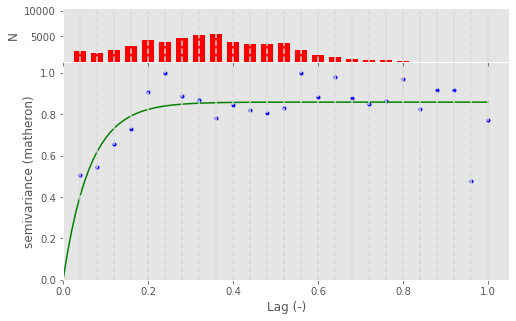

In [29]:
xdata_e, ydata_e, xi_e, yi_e, Ve = exponencial(coords, values)

Text(0.5, 1.0, 'Semivariograma - Modelo Exponencial')

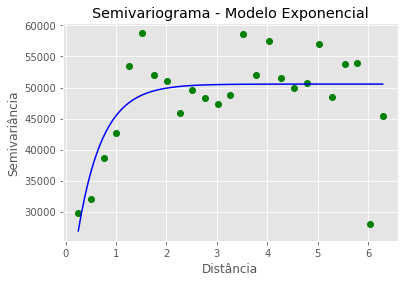

In [30]:
plt.plot(xdata_e, ydata_e, 'og')
plt.plot(xi_e, yi_e, '-b');
plt.xlabel('Distância')
plt.ylabel('Semivariância')
plt.title('Semivariograma - Modelo Exponencial')

## 3.4 Plot dos gráficos 
**Função para plotar os gráficos**

In [31]:
def plot_graficos(xdata_g, ydata_g, xi_g, yi_g, xdata_s, ydata_s, xi_s, yi_s, xdata_e, ydata_e, xi_e, yi_e):
    fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharey=True)

    axs[0, 0].set_title('Semivariograma - Modelo Gaussiano')
    axs[0, 0].set_xlabel('Distância')
    axs[0, 0].set_ylabel('Semivariância')
    axs[0, 0].plot(xdata_g, ydata_g, 'og')
    axs[0, 0].plot(xi_g, yi_g, '-b');

    axs[0, 1].set_title('Semivariograma - Modelo Esférico')
    axs[0, 1].set_xlabel('Distância')
    axs[0, 1].set_ylabel('Semivariância')
    axs[0, 1].plot(xdata_s, ydata_s, 'og')
    axs[0, 1].plot(xi_s, yi_s, '-b');

    axs[1, 0].set_title('Semivariograma - Modelo Exponencial')
    axs[1, 0].set_xlabel('Distância')
    axs[1, 0].set_ylabel('Semivariância')
    axs[1, 0].plot(xdata_e, ydata_e, 'og')
    axs[1, 0].plot(xi_e, yi_e, '-b');
    

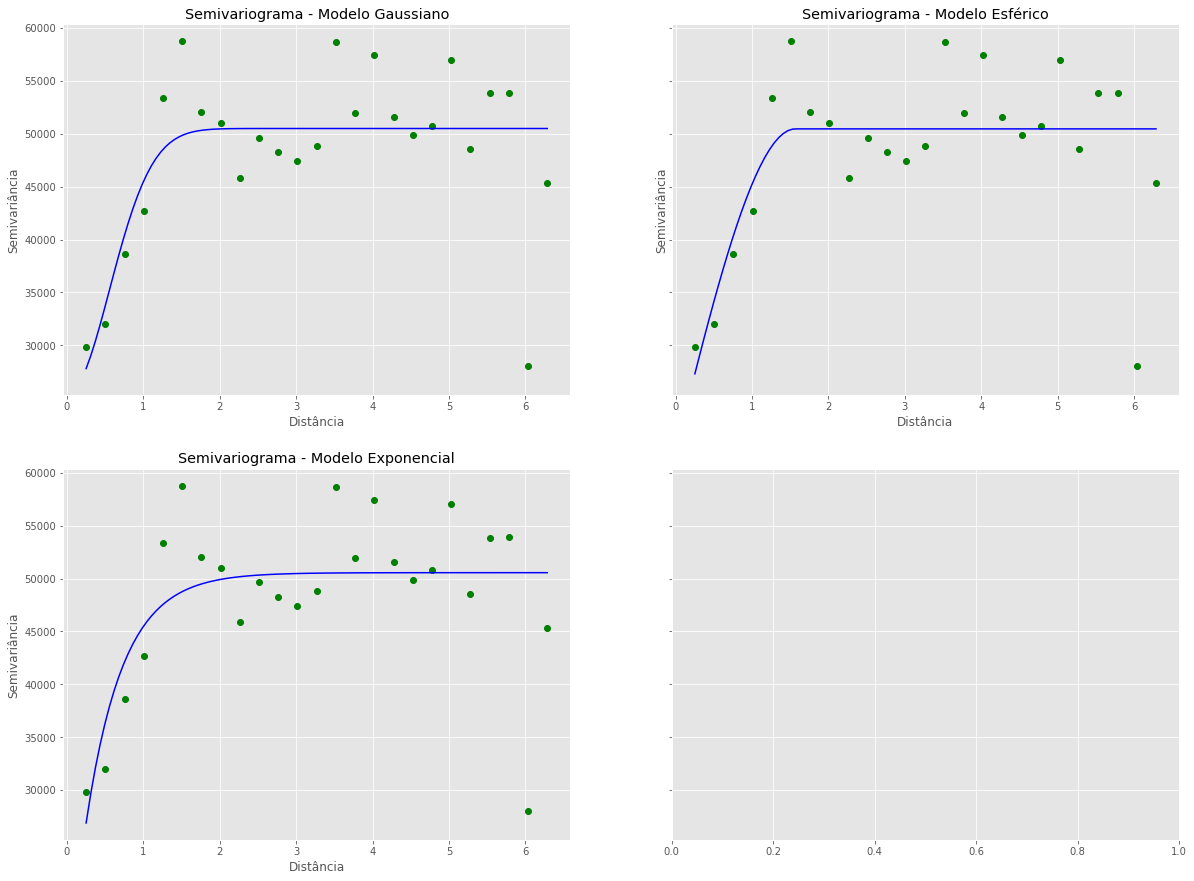

In [32]:
plot = plot_graficos(xdata_g, ydata_g, xi_g, yi_g, xdata_s, ydata_s, xi_s, yi_s, xdata_e, ydata_e, xi_e, yi_e)

## 3.5 Teste com normalização dos dados

In [33]:
values = values.reshape(-1, 1) 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
values = scaler.fit_transform(values)
values = values.flatten()

Coeficientes encontrados para ajustar o modelo aos dados:
range: 1.58   sill: 1   nugget: 0.53

Gaussian   RMSE: 0.15
Gaussian effective range:    0.8


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


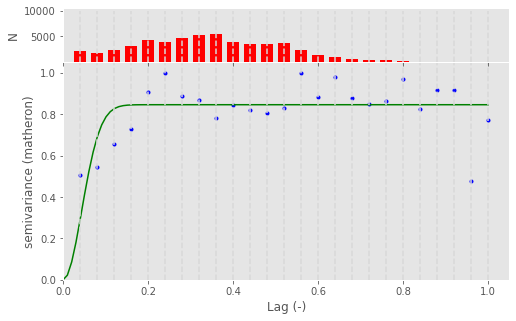

In [35]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)

Text(0.5, 1.0, 'Semivariograma - Modelo Gaussiano')

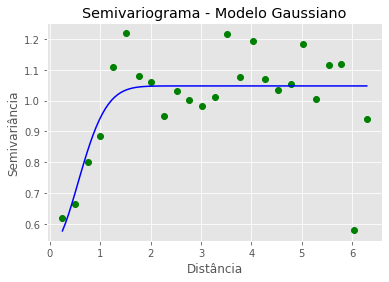

In [36]:
plt.plot(xdata_g, ydata_g, 'og')
plt.plot(xi_g, yi_g, '-b');
plt.xlabel('Distância')
plt.ylabel('Semivariância')
plt.title('Semivariograma - Modelo Gaussiano')

# 4. Filtrando dados de argila para melhorar a cauda

## 4.1 (opção 1)

- **Selecionando os valores de argila abaixo de 367 ( primeiro quartil), agrupando os municipios iguais, ou seja, pontos de coleta distintos mas no mesmo município e selecionando os pontos de coleta com o valor máximo de argila**

In [37]:
lista_argila_max = []
argila_max = df_pr[df_pr['Argila'] <= 367].groupby('municipio').Argila.apply(max)
for m in argila_max.index:
    argila_max_df_pr = df_pr.loc[(df_pr['municipio'] == m) & (df_pr['Argila'] == argila_max[m] )]
    lista_argila_max.append(argila_max_df_pr)
    
df_argila_max = pd.concat(lista_argila_max)

lista_index = []
for i in df_argila_max.index:
     lista_index.append(i)
        
argila_restante = df_pr[df_pr['Argila'] > 367] 
for i in argila_restante.index:
    lista_index.append(i)


In [38]:
filtrados = []
for i in lista_index:
    filtrados.append(df_pr[df_pr.index == i])
    
df_argila_filtrado_max = pd.concat(filtrados)
#df_argila_filtrado_max

In [39]:
df_argila_filtrado_max = df_argila_filtrado_max[['Argila', 'latitude', 'longitude']].dropna()
df_argila_filtrado_max.reset_index(inplace=True, drop=True)

### Métricas estatísticas do df_pr_argila FILTRADO

In [40]:
print(f'Quantidade de dados após filtro:',len(df_argila_filtrado_max))

Quantidade de dados após filtro: 298


In [41]:
df_argila_filtrado_max['Argila'].describe()

count    298.000000
mean     560.463087
std      194.993828
min       50.000000
25%      442.500000
50%      599.500000
75%      730.000000
max      830.000000
Name: Argila, dtype: float64

### Métricas estatísticas do df_pr_argila NÃO FILTRADO

In [42]:
df_pr_argila['Argila'].describe()

count    332.000000
mean     520.897590
std      219.904789
min       10.000000
25%      367.500000
50%      570.000000
75%      710.000000
max      830.000000
Name: Argila, dtype: float64

### Plot dos dados de Argila NÃO FILTRADO

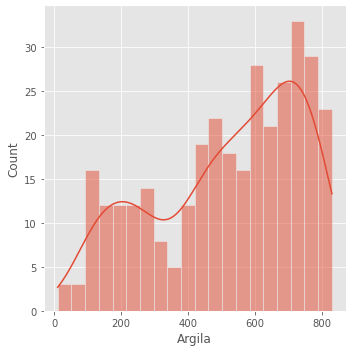

In [43]:
sns.displot(df_pr_argila, x="Argila",  kde=True, bins=20) 

### Plot dos dados de Argila FILTRADO

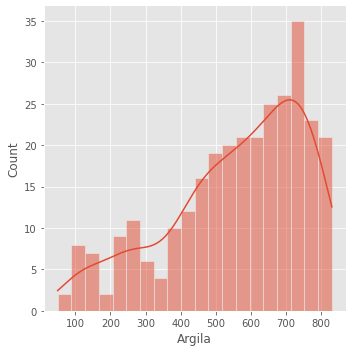

In [44]:
sns.displot(df_argila_filtrado_max, x="Argila",  kde=True, bins=20)  

## 4.1.1 Variogramas com df_argila_filtrado _max


### Separando coordenadas e values

In [45]:
coords= df_argila_filtrado_max[['longitude','latitude']].to_numpy()
values = df_argila_filtrado_max['Argila'].to_numpy()

Coeficientes encontrados para ajustar o modelo aos dados:
range: 1.70   sill: 33905   nugget: 8675.14

Spherical   RMSE: 5345.88
Spherical effective range:    1.5


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


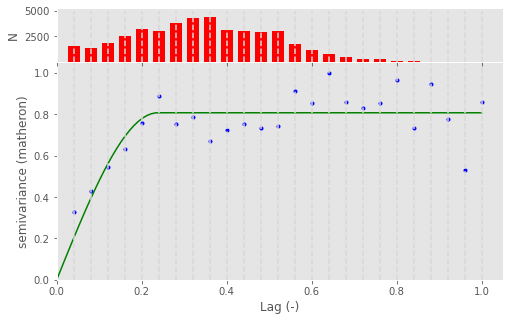

In [46]:
xdata_s, ydata_s, xi_s, yi_s, Vs = esferico(coords, values)

/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Coeficientes encontrados para ajustar o modelo aos dados:
range: 2.06   sill: 38985   nugget: 4333.96

Exponential   RMSE: 5211.29
Exponential effective range:    1.8


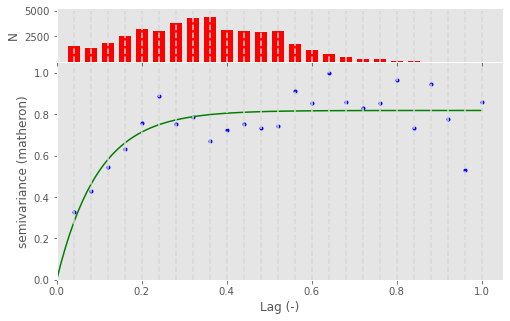

In [47]:
xdata_e, ydata_e, xi_e, yi_e, Ve = exponencial(coords, values)

Coeficientes encontrados para ajustar o modelo aos dados:
range: 1.76   sill: 27851   nugget: 14839.47

Gaussian   RMSE: 5779.30
Gaussian effective range:    1.3


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


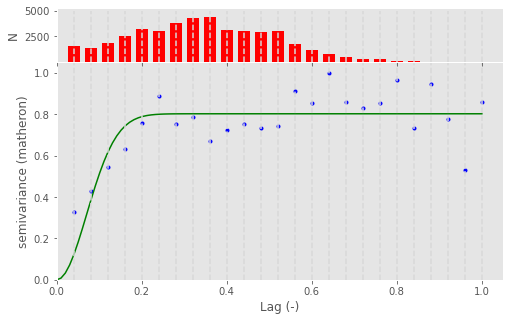

In [48]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)

## 4.1.2 Plot dos gráficos 

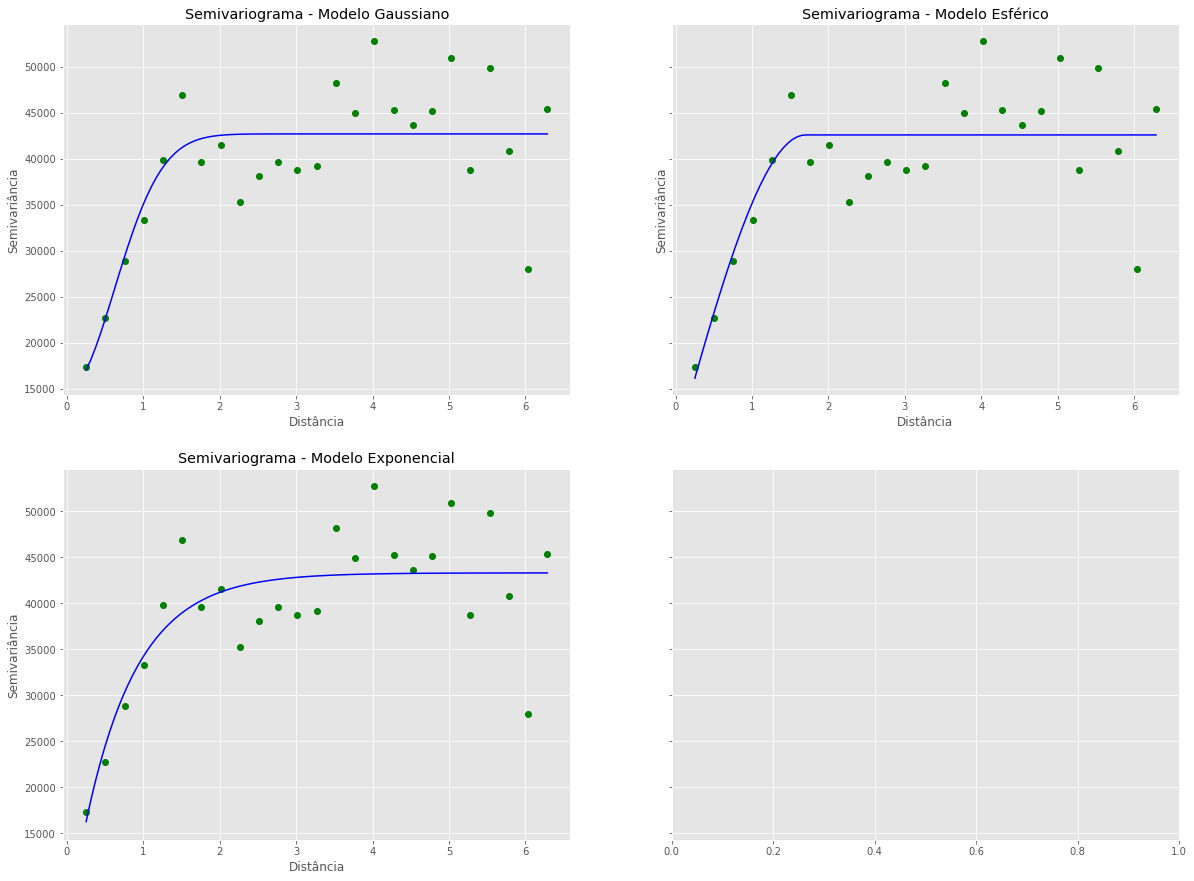

In [49]:
plot = plot_graficos(xdata_g, ydata_g, xi_g, yi_g, xdata_s, ydata_s, xi_s, yi_s, xdata_e, ydata_e, xi_e, yi_e)

## 4.2 (opção 2)

- **Deixando somente um ponto por cidade, agrupando os municipios com seus pontos e selecionando o ponto com maior valor de Argila**

In [50]:
lista_argila_max = []
argila_max = df_pr.groupby('municipio').Argila.apply(max)
for m in argila_max.index:
    argila_max_df_pr = df_pr.loc[(df_pr['municipio'] == m) & (df_pr['Argila'] == argila_max[m] )]
    lista_argila_max.append(argila_max_df_pr)
    
df_argila_max = pd.concat(lista_argila_max)

lista_index = []
for i in df_argila_max.index:
     lista_index.append(i)
        

In [51]:
filtrados = []
for i in lista_index:
    filtrados.append(df_pr[df_pr.index == i])
    
df_argila_filtrado_max_geral = pd.concat(filtrados)
#df_argila_filtrado_max_geral

In [52]:
df_argila_filtrado_max_geral = df_argila_filtrado_max_geral[['Argila', 'latitude', 'longitude']].dropna()
df_argila_filtrado_max_geral.reset_index(inplace=True, drop=True)

### Métricas argila filtrado

In [53]:
df_argila_filtrado_max_geral['Argila'].describe()

count    128.000000
mean     542.835938
std      234.812835
min       50.000000
25%      405.000000
50%      620.000000
75%      740.000000
max      830.000000
Name: Argila, dtype: float64

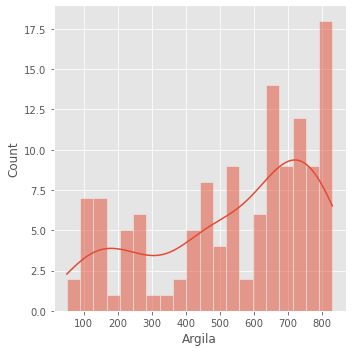

In [54]:
sns.displot(df_argila_filtrado_max_geral, x="Argila",  kde=True, bins=20) 

## 4.3  (opção 3)



- **Deixando somente um ponto por cidade, agrupando os municipios com seus pontos e fazendo a média do valor de Argila, latitude e longitude**

In [55]:
def media(lista):
    soma = sum(lista)
    qt = len(lista)
    media = soma/qt
    return media

argila_media = df_pr.groupby('municipio').Argila.apply(media)
latitude_media = df_pr.groupby('municipio').latitude.apply(media)
longitude_media = df_pr.groupby('municipio').longitude.apply(media)

df_argila_filtrado_media_geral = pd.concat([argila_media, latitude_media,longitude_media], axis=1).reset_index(drop=True)
#df_argila_filtrado_media_geral    

In [56]:
df_argila_filtrado_media_geral['Argila'].describe()

count    109.000000
mean     484.553244
std      221.381276
min       50.000000
25%      300.000000
50%      507.500000
75%      670.000000
max      820.000000
Name: Argila, dtype: float64

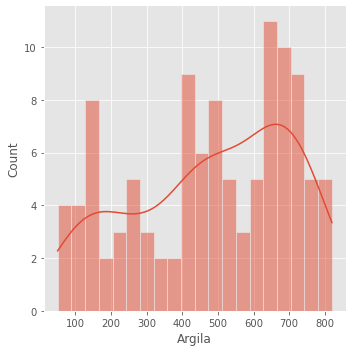

In [57]:
sns.displot(df_argila_filtrado_media_geral, x="Argila",  kde=True, bins=20) 

## 4.4 (opção 4)

- **Selecionando os valores de argila abaixo de 367 ( primeiro quartil), agrupando os municipios iguais, ou seja, pontos de coleta distintos mas no mesmo município e fazendo a média do valor de Argila, latitude e longitude**

In [58]:
argila_media = df_pr[df_pr['Argila'] <= 367].groupby('municipio').Argila.apply(media)
latitude_media = df_pr[df_pr['Argila'] <= 367].groupby('municipio').latitude.apply(media)
longitude_media = df_pr[df_pr['Argila'] <= 367].groupby('municipio').longitude.apply(media)

df_argila_m = pd.concat([argila_media, latitude_media,longitude_media], axis=1).reset_index(drop=True)
#df_argila_m    

In [59]:
df_argila_restante = df_pr[df_pr['Argila'] > 367] 
df_argila_restante = df_argila_restante[['Argila', 'latitude', 'longitude']].dropna()
df_argila_restante.reset_index(inplace=True, drop=True)
#df_argila_restante

In [60]:
df_argila_filtrado_media = pd.concat([df_argila_m,df_argila_restante], ignore_index=True )
#df_argila_filtrado_media

In [61]:
df_argila_filtrado_media['Argila'].describe()

count    296.000000
mean     560.776745
std      196.878924
min       50.000000
25%      450.000000
50%      600.000000
75%      730.000000
max      830.000000
Name: Argila, dtype: float64

### Média dos valores de argila (dos valores de argila abaixo de 367 - primeiro quartil-)

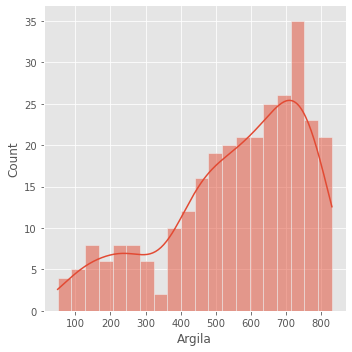

In [62]:
sns.displot(df_argila_filtrado_media, x="Argila",  kde=True, bins=20) 

## 4.5 (opção 5)

- **Retirando do dataframe os pontos com valores de argila abaixo de 200**

In [63]:
df_argila_rm = df_pr[df_pr['Argila'] >= 200]
df_argila_rm = df_argila_rm[['Argila', 'latitude', 'longitude']].dropna()
df_argila_rm.reset_index(inplace=True, drop=True)
#df_argila_rm

In [64]:
df_argila_rm['Argila'].describe()

count    292.000000
mean     574.537671
std      175.496454
min      200.000000
25%      450.000000
50%      607.000000
75%      730.000000
max      830.000000
Name: Argila, dtype: float64

Quantidade de pontos SEM remoção: 332
Quantidade de pontos COM remoção: 292


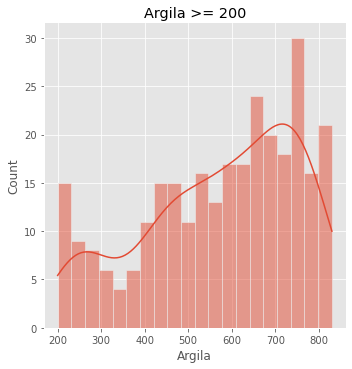

In [65]:
sns.displot(df_argila_rm, x="Argila",  kde=True, bins=20).set(title='Argila >= 200')
print('Quantidade de pontos SEM remoção:', len(df_pr_argila))
print('Quantidade de pontos COM remoção:', len(df_argila_rm))


### Semivariogramas

Coeficientes encontrados para ajustar o modelo aos dados:
range: 15.98   sill: 22402   nugget: 23528.66

Exponential   RMSE: 4748.52
Exponential effective range:    1.4


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


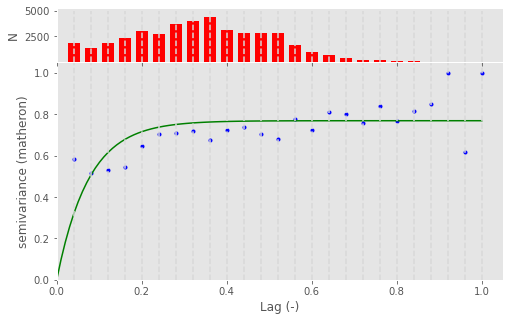

In [66]:
coords= df_argila_rm[['longitude','latitude']].to_numpy()
values = df_argila_rm['Argila'].to_numpy()
xdata_e, ydata_e, xi_e, yi_e, Ve = exponencial(coords, values)

Coeficientes encontrados para ajustar o modelo aos dados:
range: 6.69   sill: 12625   nugget: 26128.65

Gaussian   RMSE: 5280.24
Gaussian effective range:    0.4


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


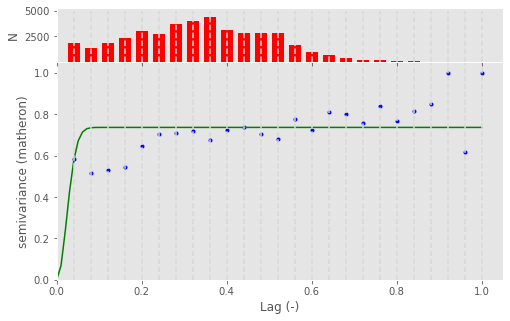

In [67]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)


Coeficientes encontrados para ajustar o modelo aos dados:
range: 8.15   sill: 15853   nugget: 24538.13

Spherical   RMSE: 5285.32
Spherical effective range:    0.4


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


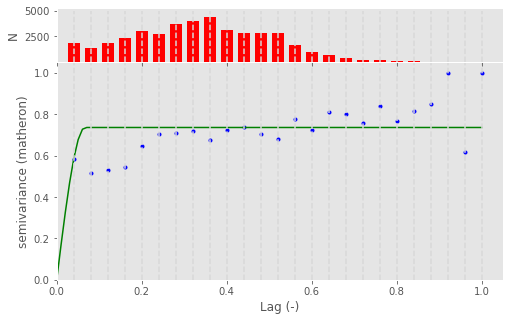

In [68]:
xdata_s, ydata_s, xi_s, yi_s, Vs = esferico(coords, values)

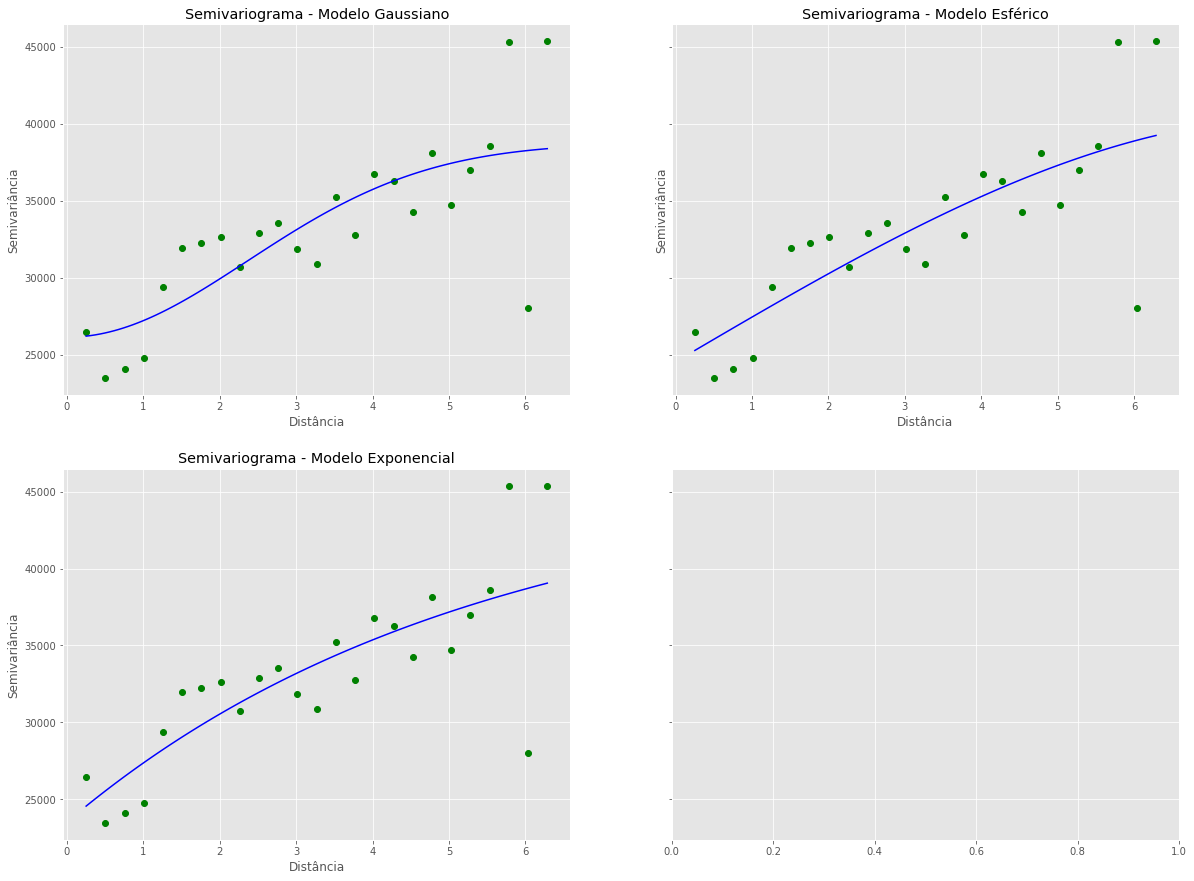

In [69]:
plot = plot_graficos(xdata_g, ydata_g, xi_g, yi_g, xdata_s, ydata_s, xi_s, yi_s, xdata_e, ydata_e, xi_e, yi_e)

#  5. Exportando  DataFrame para krigagem no R 

**Função responsável por transformar Longitude e Latitude em UTM**

In [70]:
import pandas as pd 
import numpy as np
from pyproj import Transformer

def lat_lon_utm(df, caracteristica, zona):
    lat_lon = df.copy()
    
    trans = Transformer.from_crs(
    "epsg:4326",
    f"+proj=utm +zone={zona} +ellps=WGS84 +south=True",
    always_xy=True,
    )
        
    xx, yy = trans.transform(lat_lon["longitude"].values, lat_lon["latitude"].values)
    lat_lon["x"] = xx
    lat_lon["y"] = yy
    
    # Removendo casas decimais na UTM
    lat_lon['y'] = pd.to_numeric(lat_lon['y'].apply(lambda x: '%.0f' % x))
    lat_lon['x'] = pd.to_numeric(lat_lon['x'].apply(lambda x: '%.0f' % x))

    lat_lon = lat_lon.drop([caracteristica, 'latitude', 'longitude'], axis=1)
    # Drop de valores de x e y repetidos, ou seja, no csv tem pontos diferentes mas com as mesmas coordenadas
    lat_lon.drop_duplicates(inplace=True)
    df_convertido =pd.concat([df[caracteristica], lat_lon], axis=1)
    df_convertido.dropna(inplace=True)
    return df_convertido

**Exportando DataFrame dos dados de Argila sem filtro**

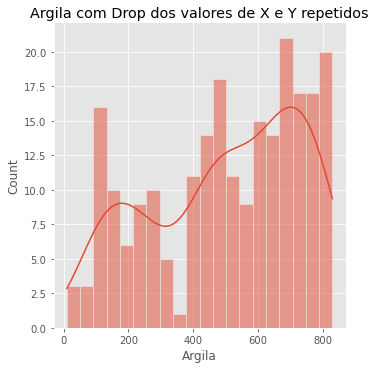

In [71]:
df_convertido = lat_lon_utm(df_pr_argila, caracteristica ='Argila', zona='22')
sns.displot(df_convertido, x="Argila",  kde=True, bins=20).set(title='Argila com Drop dos valores de X e Y repetidos')
#df_convertido.to_csv(f'../dados/solo/dados_caracteristica/argila/df_argila_convertido.csv', index=False)

**Exportando DataFrame dos dados de Argila com filtro ( tópico 4.1 - opção 1-)**

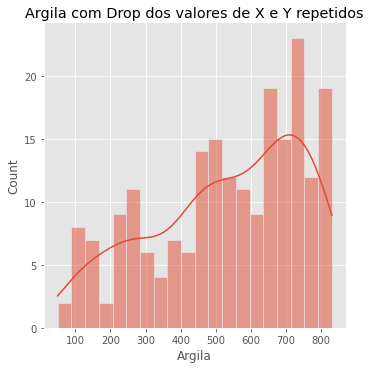

In [74]:
df_convertido = lat_lon_utm(df_argila_filtrado_max, caracteristica ='Argila', zona='22')
sns.displot(df_convertido, x="Argila",  kde=True, bins=20).set(title='Argila com Drop dos valores de X e Y repetidos')
#df_convertido.to_csv(f'../dados/solo/dados_caracteristica/argila/df_argila_filtrado_opcao_1.csv', index=False)

**Exportando DataFrame dos dados de Argila com filtro ( tópico 4.5 - opção 5-)**

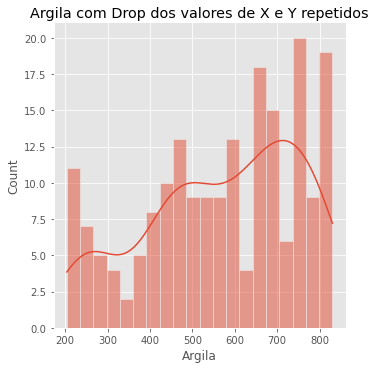

In [75]:
df_convertido = lat_lon_utm(df_argila_rm, caracteristica ='Argila', zona='22')
sns.displot(df_convertido, x="Argila",  kde=True, bins=20).set(title='Argila com Drop dos valores de X e Y repetidos')
#df_convertido.to_csv(f'../dados/solo/dados_caracteristica/argila/df_argila_filtrado_opcao_5.csv', index=False)

**Exportando DataFrame dos dados de Argila com filtro (outliers)**

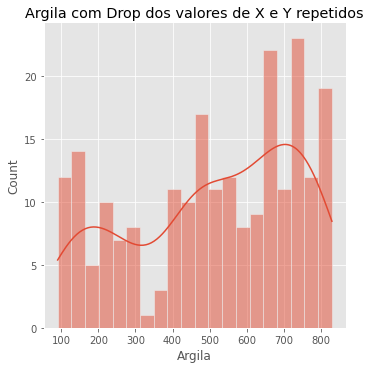

In [76]:
df_convertido = lat_lon_utm(df_argila_outliers, caracteristica ='Argila', zona='22')
sns.displot(df_convertido, x="Argila",  kde=True, bins=20).set(title='Argila com Drop dos valores de X e Y repetidos')
#df_convertido.to_csv(f'../dados/solo/dados_caracteristica/argila/df_argila_filtrado_opcao_5.csv', index=False)

# 6. Teste Krigagem

### Abrindo dataframe exportado no tópico 4.5.1

In [ ]:
argila= pd.read_csv('../dados/solo/dados_caracteristica/argila/df_argila_convertido.csv')
argila

### Separando dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = argila.drop('Argila',axis=1)
y = argila['Argila']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
latitudes = X_train['y']
longitudes = X_train['x']
values = y_train

test_latitudes = X_test['y']
test_longitudes = X_test['x']

### Krigagem Ordinaria

In [ ]:
from pykrige.ok import OrdinaryKriging
OK = OrdinaryKriging(
    longitudes,
    latitudes,
    values,
    variogram_model="gaussian",
    verbose=True,
    enable_plotting=True,
    coordinates_type="euclidean",
    nlags=25,
)

z1, ss1 = OK.execute("points", test_longitudes, test_latitudes)
print("Predicted_Value:    ", np.array(z1))
#print("Sigma²:   ", np.array(ss1))

# 7. Fósforo Assimilável

In [ ]:
df_pr_fosforo = df_pr[['Fosforo_Assimilavel', 'latitude', 'longitude']].dropna()
df_pr_fosforo.reset_index(inplace=True, drop=True)

# Métricas estatísticas
df_pr_fosforo['Fosforo_Assimilavel'].describe()

In [ ]:
len(df_pr_fosforo)

In [ ]:
df_pr_fosforo.drop(df_pr_fosforo[df_pr_fosforo['Fosforo_Assimilavel'] == ','].index, inplace=True)

In [ ]:
sns.displot(df_pr_fosforo, x="Fosforo_Assimilavel",  kde=True, bins=40)

### Realizando tratamento dos dados

In [ ]:
def tratamento(numero):
    if numero == '<1':
        novo_numero = float(numero.replace('<',''))
        
    elif numero == '< 1':
        novo_numero = float(numero.replace('< ',''))
        
    else:
        novo_numero = float(numero)
        
    return novo_numero

In [ ]:
df_pr_fosforo['Fosforo_Assimilavel'] = df_pr_fosforo['Fosforo_Assimilavel'].apply(tratamento)
sns.displot(df_pr_fosforo, x="Fosforo_Assimilavel",kde=True, bins=40)

In [ ]:
coords= df_pr_fosforo[['longitude','latitude']].to_numpy()
values = df_pr_fosforo['Fosforo_Assimilavel'].to_numpy()

In [ ]:
xdata_s, ydata_s, xi_s, yi_s, Vs = esferico(coords, values)

In [ ]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)

In [ ]:
xdata_e, ydata_e, xi_e, yi_e, Ve = exponencial(coords, values)

In [ ]:
plot = plot_graficos(xdata_g, ydata_g, xi_g, yi_g, xdata_s, ydata_s, xi_s, yi_s, xdata_e, ydata_e, xi_e, yi_e)

## 7.1 Exportando  DataFrame para krigagem no R 

In [ ]:
df_convertido = lat_lon_utm(df_pr_fosforo, caracteristica ='Fosforo_Assimilavel', zona='22')
df_convertido.to_csv(f'../dados/solo/dados_caracteristica/fosforo/df_fosforo_convertido.csv', index=False)

## 8. Material de origem

In [77]:
df_pr_material = df_pr[['Material_origem', 'latitude', 'longitude']].dropna()
df_pr_material

,Material_origem,latitude,longitude
30603,Produtos de meteorização de migmatitos.,-25.980000,-48.720000
717,Folhelhos.,-24.799901,-49.841581
27321,Folhelhos.,-24.799901,-49.841581
722,Saprolitos derivados de folhelhos argilosos.,-24.799901,-49.841581
27327,Folhelho.,-24.799901,-49.841581
...,...,...,...
7864,Produtos da meteorização das rochas supracitadas.,-25.398796,-51.556465
7495,Saprolito proveniente das rochas acima citadas.,-25.398796,-51.556465
22313,Saprolito proveniente da decomposição das roch...,-25.785090,-51.632257
7868,Saprolito proveniente da decomposição das roch...,-25.398796,-51.556465


In [78]:
material = df_pr_material['Material_origem']
material

30603              Produtos de meteorização de migmatitos.
717                                             Folhelhos.
27321                                           Folhelhos.
722           Saprolitos derivados de folhelhos argilosos.
27327                                            Folhelho.
                               ...                        
7864     Produtos da meteorização das rochas supracitadas.
7495       Saprolito proveniente das rochas acima citadas.
22313    Saprolito proveniente da decomposição das roch...
7868     Saprolito proveniente da decomposição das roch...
7987     Produtos de alteração de rochas eruptivas bási...
Name: Material_origem, Length: 327, dtype: object

### Label Encoder

In [79]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(material)
classes = list(le.classes_)
labels = le.transform(material)

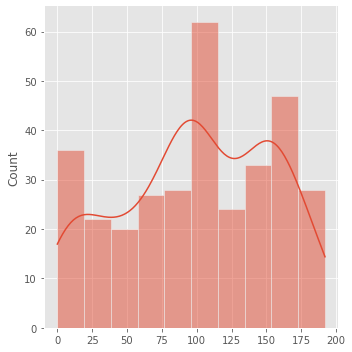

In [80]:
sns.displot(labels, kde=True)

In [81]:
coords= df_pr_material[['longitude','latitude']].to_numpy()
values = labels.copy()

Coeficientes encontrados para ajustar o modelo aos dados:
range: 18153.59   sill: -2213067   nugget: 3234.63

Spherical   RMSE: 416.73
Spherical effective range:    0.3


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


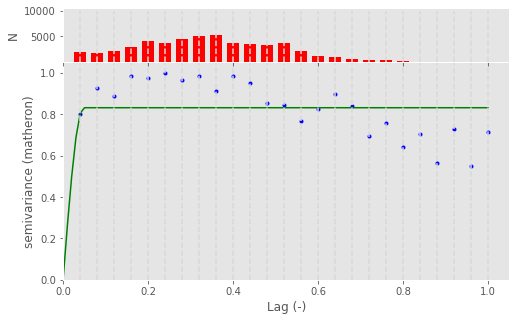

In [82]:
xdata_s, ydata_s, xi_s, yi_s, Vs = esferico(coords, values)

Coeficientes encontrados para ajustar o modelo aos dados:
range: 28.15   sill: -6284   nugget: 3053.83

Gaussian   RMSE: 416.73
Gaussian effective range:    0.3


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


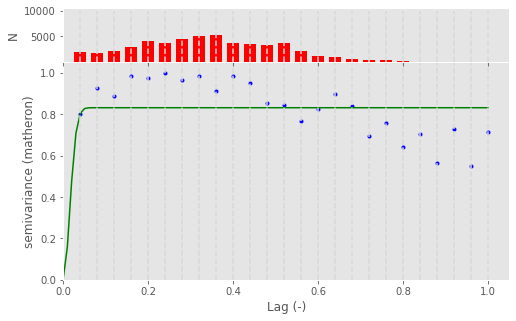

In [83]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)

Coeficientes encontrados para ajustar o modelo aos dados:
range: 0.08   sill: 1372943   nugget: -1370302.84

Exponential   RMSE: 416.81
Exponential effective range:    0.2


/home/igornieto/anaconda3/envs/tmg/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


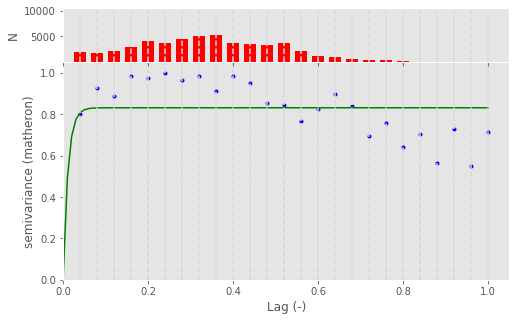

In [84]:
xdata_e, ydata_e, xi_e, yi_e, Ve = exponencial(coords, values)

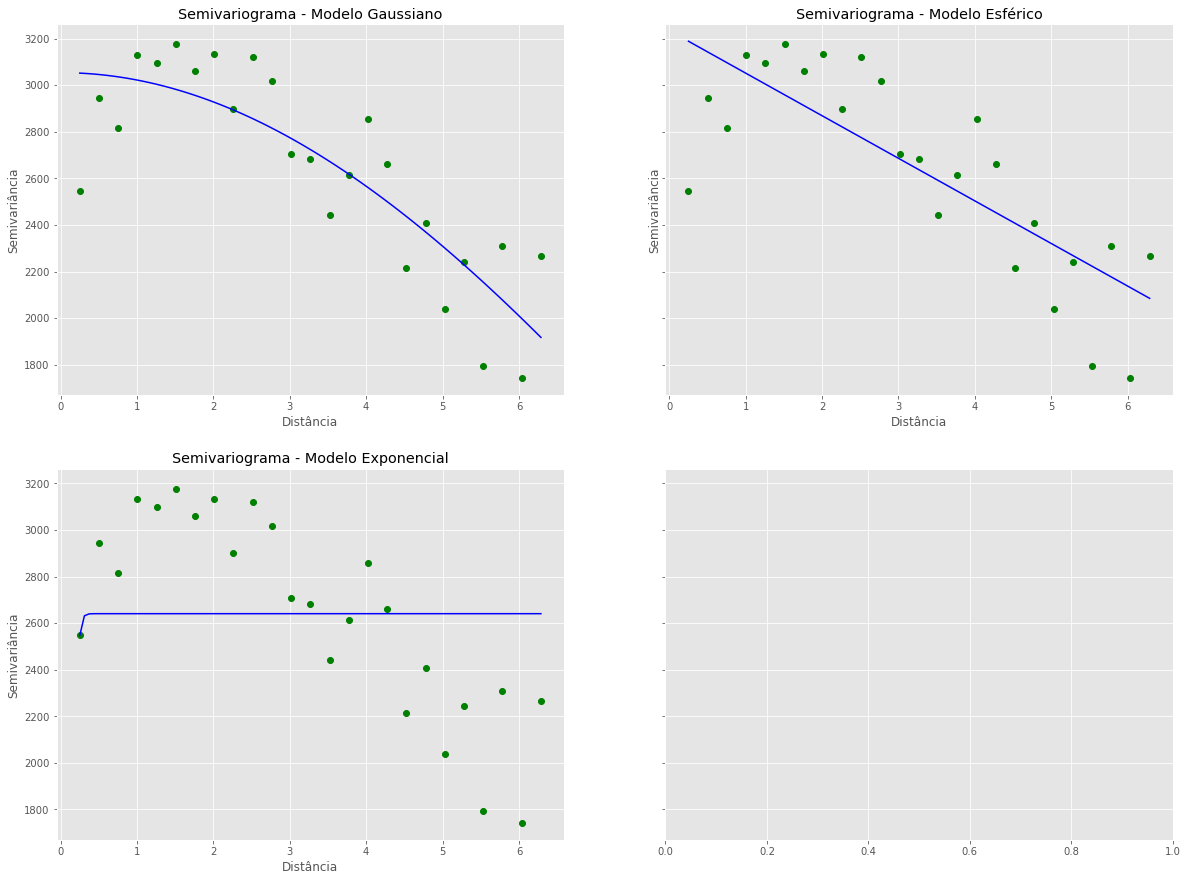

In [85]:
plot = plot_graficos(xdata_g, ydata_g, xi_g, yi_g, xdata_s, ydata_s, xi_s, yi_s, xdata_e, ydata_e, xi_e, yi_e)